# Week-6 Excercise -1
 By-

**Pratinav Seth 200968216**

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Q1 Write down the meta information about the “wine.csv” data file available in the UCI repository, https://archive.ics.uci.edu/ml/datasets/Wine.

### Metadata

**Data Set Information:**

**Title of Database**: *Wine recognition data*

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it )

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline

**Attribute Information:**

All attributes are continuous.No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant)

NOTE: 1st attribute is class identifier (1-3)


**Relevant Papers:**

(1)
S. Aeberhard, D. Coomans and O. de Vel,
Comparison of Classifiers in High Dimensional Settings,
Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
Mathematics and Statistics, James Cook University of North Queensland.
(Also submitted to Technometrics).

The data was used with many others for comparing various
classifiers. The classes are separable, though only RDA
has achieved 100% correct classification.
(RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
(All results using the leave-one-out technique)



(2)
S. Aeberhard, D. Coomans and O. de Vel,
"THE CLASSIFICATION PERFORMANCE OF RDA"
Tech. Rep. no. 92-01, (1992), Dept. of Computer Science and Dept. of
Mathematics and Statistics, James Cook University of North Queensland.
(Also submitted to Journal of Chemometrics).


Source:

Original Owners:

Forina, M. et al, PARVUS -
An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.

Donor:

Stefan Aeberhard, email: stefan '@' coral.cs.jcu.edu.au

In [11]:
df = pd.read_csv("wine.csv")
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Q2 Tabulate and visualize the distribution of the numeric variables.

In [12]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [13]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Since all are numeric we visualize all the attributes using a histogram and kdeplot.

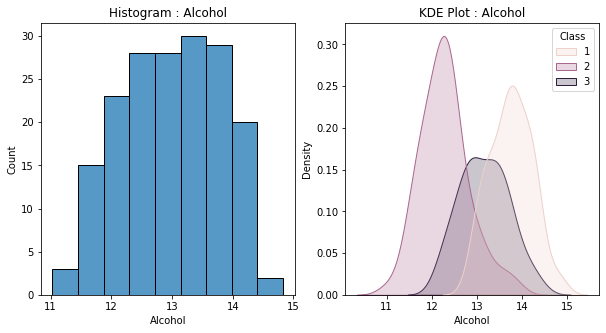

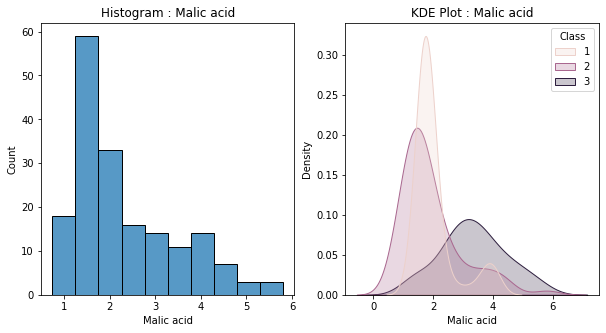

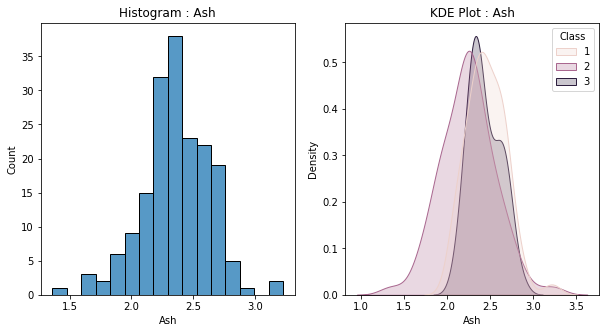

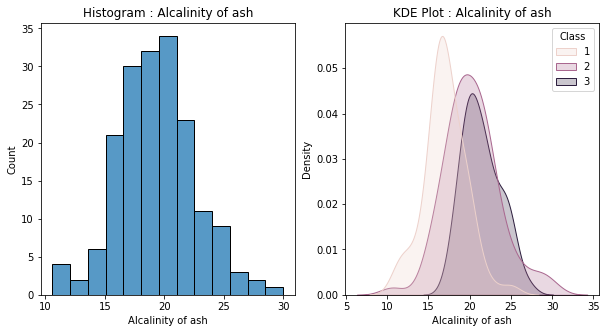

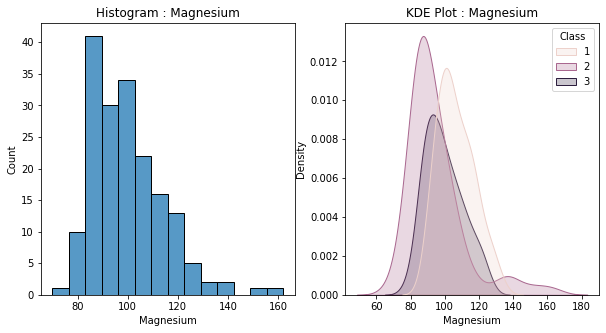

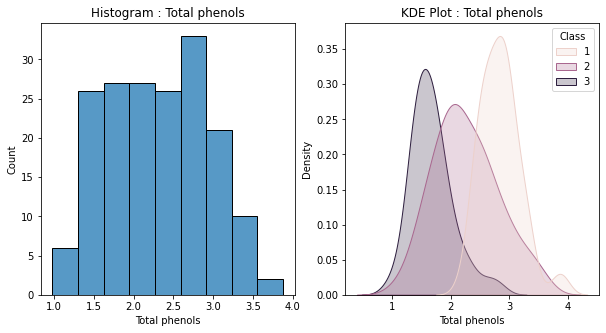

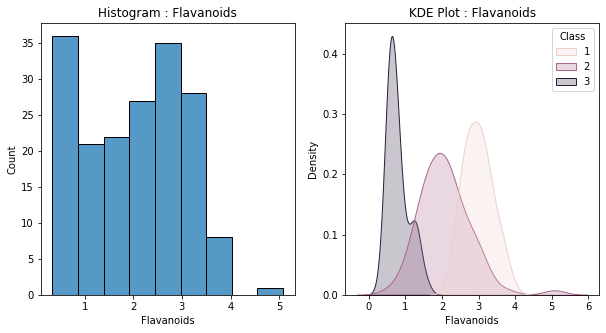

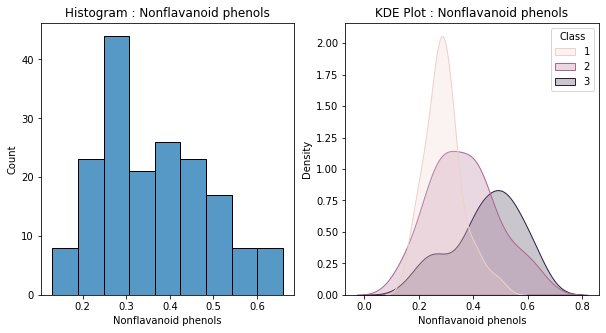

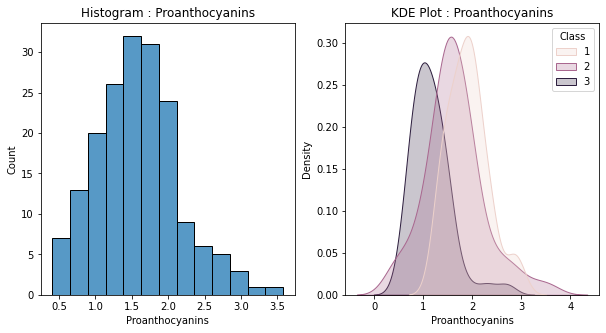

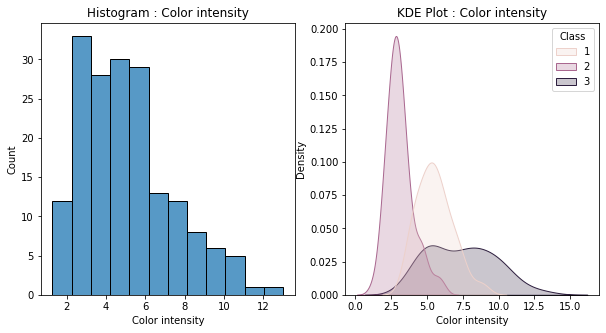

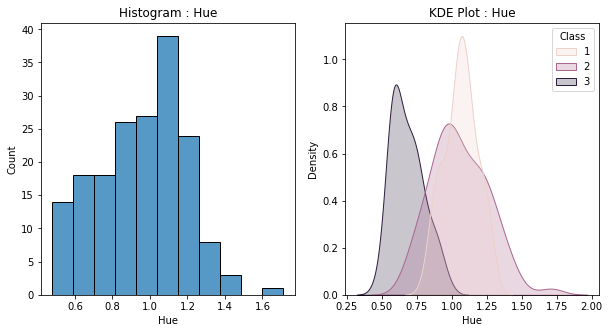

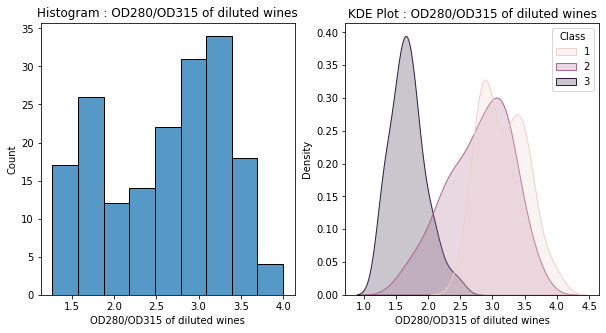

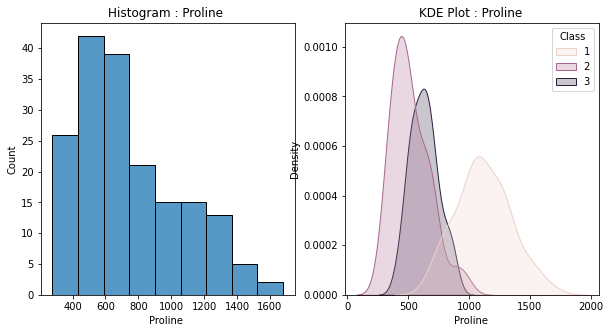

In [28]:
for column in df.columns:
    if column == 'Class':
        continue
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.title("Histogram : "+column)
    sns.histplot(data=df, x=column)
    plt.subplot(1, 2, 2)
    plt.title("KDE Plot : "+column)
    sns.kdeplot(data=df, x=column, hue = 'Class', shade = True)
    plt.show()

### Q3 Perform  the  required  preprocessing  ,  70,30  split  and  build  a  classifier  using  the Multi-Layer  Perceptron  Classifier  model  available  in  SciKit  Learn.  Use  3  layers with  the  same  number  of  neurons  as  there  are  features  along  with  500  max iterations.

In [15]:
Y = df.Class
X = df.drop('Class', axis =1)

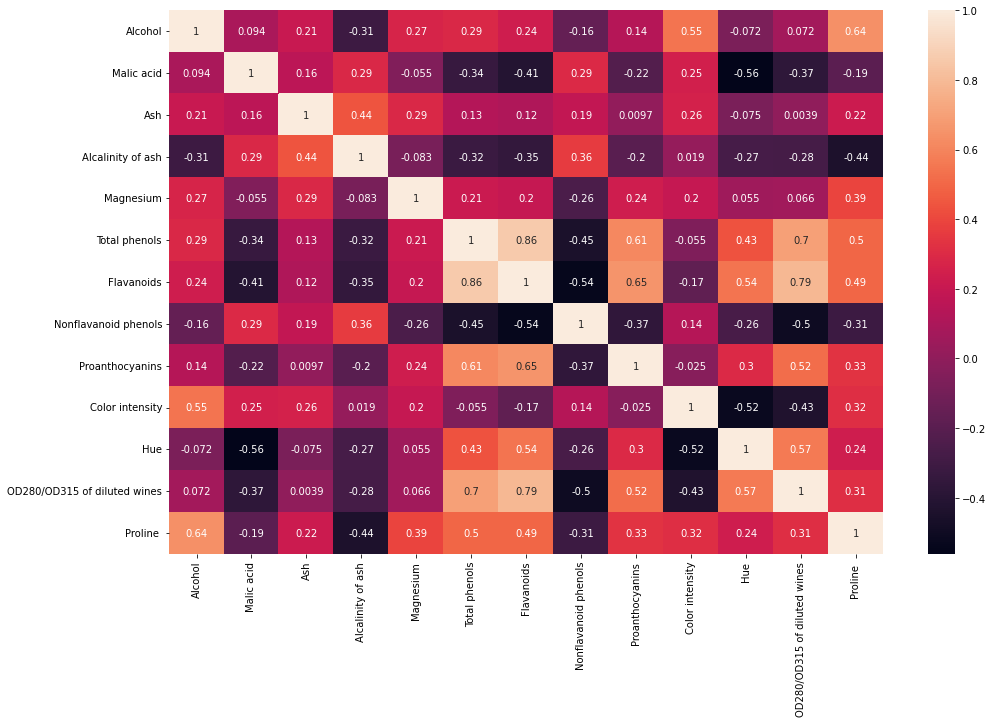

In [16]:
plt.figure(figsize=(16,10))
sns.heatmap(X.corr(), annot= True)
plt.show()

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
model = MLPClassifier(hidden_layer_sizes = (12,12,12), max_iter = 500)
model.fit(X_train, Y_train)

MLPClassifier(hidden_layer_sizes=(12, 12, 12), max_iter=500)

In [20]:
test_pred = model.predict(X_test)

In [21]:
cf_matrix = confusion_matrix(test_pred, Y_test)
print(cf_matrix)

[[19  0  0]
 [ 0 21  0]
 [ 0  0 14]]


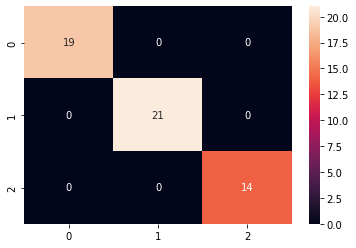

In [22]:
sns.heatmap(cf_matrix, annot = True)
plt.show()

In [23]:
print(f"Accuracy of the model on test set: {accuracy_score(test_pred, Y_test):.6f}")

Accuracy of the model on test set: 1.000000


### Q4 Tabulate the precision, recall and F1-score.

In [24]:
clf_report = classification_report(Y_test, test_pred)
print(clf_report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



### Q5 Display the  MLP weights and biases after training your model.

In [25]:
weights, bias = model.coefs_, model.intercepts_
print("Weights = ", weights)
print("Bias = ", bias)

Weights =  [array([[-0.3369282 , -0.25561726,  0.51291323,  0.43750419, -0.1591687 ,
         0.01136944,  0.1054315 ,  0.61232964, -0.11208818, -0.50237273,
         0.69594519, -0.45130569],
       [-0.53612399, -0.20109865,  0.40527979,  0.34247196, -0.09703639,
        -0.41659849, -0.36270272,  0.24612828,  0.22151311,  0.3608623 ,
        -0.20912325, -0.5450786 ],
       [-0.49345547,  0.33316307, -0.30976881, -0.34200713, -0.03847253,
         0.14827402, -0.38083543, -0.07305101,  0.59340978, -0.0176729 ,
         0.38657053,  0.26593333],
       [ 0.53622468, -0.37978077,  0.3844971 , -0.15418393,  0.57546364,
        -0.33930552,  0.21745727, -0.24532248, -0.59323791, -0.06162263,
        -0.28063993, -0.07024119],
       [-0.25306072,  0.58220676, -0.37842948, -0.27822981, -0.3064928 ,
         0.19106535, -0.22821967, -0.24528063, -0.10425927, -0.45526939,
         0.02791383, -0.218508  ],
       [ 0.20478324,  0.21412703,  0.5431007 , -0.1940549 , -0.3322138 ,
        -0